Create synthetic spectrums
**************************

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import apollinaire as apn
from apollinaire.simulate import *

%matplotlib inline

In [8]:
initialise ()

nday = 3000
# resolution
t = nday * 86400.
dt = 20.
ptday = int (86400./dt)

n = int (t / dt)

wdw = np.zeros (n)
wdw = np.reshape (wdw, (nday, ptday))
wdw[:,:ptday//2] = 1
wdw = np.ravel (wdw)
dc = np.count_nonzero (wdw) / wdw.size

nu = np.fft.rfftfreq (n, d=dt)

param_1 = [[2, 3025e-6, 0.9e-6],    
           [10, 3035e-6, 0.9e-6]]

In [9]:
tf_ideal = gen_tf_multmode (param_1, nu, chi2=False)
ideal = apn.psd.tf_to_psd (tf_ideal, 1.) + 1. 

tf = gen_tf_multmode (param_1, nu, chi2=True)
psd = apn.psd.tf_to_psd (tf, 1.) + 1.

tf_ideal_wdw = gen_tf_multmode (param_1, nu, chi2=False, conv=True, window=wdw)
ideal_wdw = apn.psd.tf_to_psd (tf_ideal_wdw, 1.) / dc + 1.   

tf_wdw = gen_tf_multmode (param_1, nu, chi2=True, conv=True, window=wdw)
psd_wdw = apn.psd.tf_to_psd (tf_wdw, 1.) / dc + 1.

(2975.0, 3075.0)

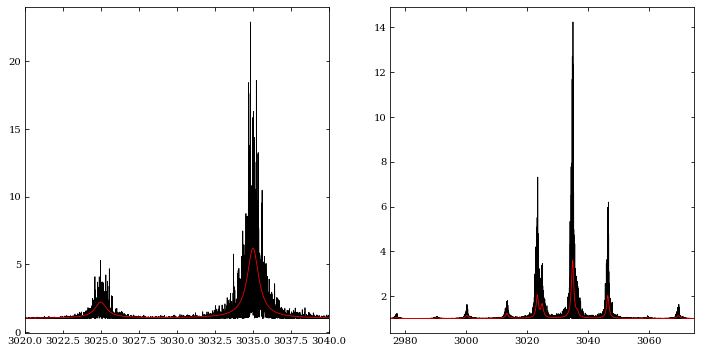

In [10]:
plt.ion ()

fig = plt.figure (figsize=(12,6))
ax1 = fig.add_subplot (121)
ax2 = fig.add_subplot (122)

ax1.plot (nu*1e6, psd, color='black')
ax1.plot (nu*1e6, ideal, color='red')
ax2.plot (nu*1e6, psd_wdw, color='black')
ax2.plot (nu*1e6, ideal_wdw, color='red')
ax1.set_xlim (3020, 3040)
ax2.set_xlim (2975, 3075)